<a href="https://colab.research.google.com/github/Osamhkk-Ai/Bike-Sharing-Demand/blob/main/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
2. Scroll down to API and click Create New API Token.
3. Open up `kaggle.json` and use the username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 64.7MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('/content/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# parsing the date and make new features

In [ ]:
train["datetime"]=pd.to_datetime(train["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
'''train["year"]=train['datetime'].dt.year
train["month"]=train['datetime'].dt.month
train["day"]=train['datetime'].dt.day
train["hour"]=train['datetime'].dt.hour
train["weekday"]=train['datetime'].dt.weekday
# droping the orignal one
train=train.drop('datetime',axis=1)
train.head()'''

'train["year"]=train[\'datetime\'].dt.year\ntrain["month"]=train[\'datetime\'].dt.month\ntrain["day"]=train[\'datetime\'].dt.day\ntrain["hour"]=train[\'datetime\'].dt.hour\ntrain["weekday"]=train[\'datetime\'].dt.weekday\n# droping the orignal one\ntrain=train.drop(\'datetime\',axis=1)\ntrain.head()'

In [ ]:
train.corr()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# there is no null above which is good 👆

In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

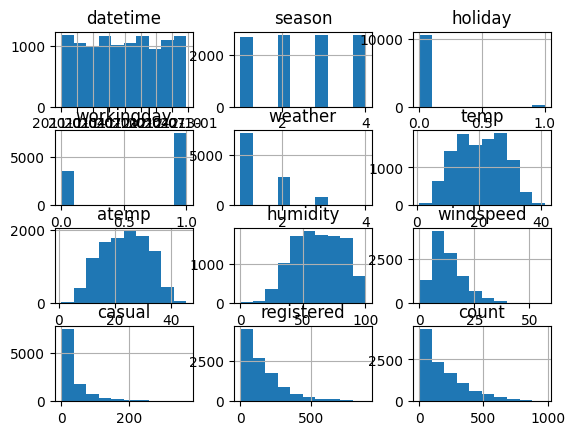

In [ ]:
train.hist()

In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
test["datetime"]=pd.to_datetime(test["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
'''test["year"]=test['datetime'].dt.year
test["month"]=test['datetime'].dt.month
test["day"]=test['datetime'].dt.day
test["hour"]=test['datetime'].dt.hour
test["weekday"]=test['datetime'].dt.weekday
# droping the orignal one
test=test.drop('datetime',axis=1)
test.head()'''

'test["year"]=test[\'datetime\'].dt.year\ntest["month"]=test[\'datetime\'].dt.month\ntest["day"]=test[\'datetime\'].dt.day\ntest["hour"]=test[\'datetime\'].dt.hour\ntest["weekday"]=test[\'datetime\'].dt.weekday\n# droping the orignal one\ntest=test.drop(\'datetime\',axis=1)\ntest.head()'

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('/content/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train = train.drop(['casual', 'registered'], axis=1)


In [ ]:
train.head()
#test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [ ]:
test.shape

(6493, 9)

In [ ]:
predictor = TabularPredictor("count",eval_metric='rmse').fit(train_data=train,time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250211_201305"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.25 GB / 12.67 GB (88.8%)
Disk Space Avail:   75.12 GB / 107.72 GB (69.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

(_ray_fit pid=3819) [1000]	valid_set's rmse: 130.657


(_ray_fit pid=3954) 
(_ray_fit pid=3954) 
(_ray_fit pid=3954) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=3954) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=3954) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=3954) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=3954)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=4009) 
(_ray_fit pid=4009) 


(_ray_fit pid=4009) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster]


(_ray_fit pid=4052) 
(_ray_fit pid=4052) 
(_ray_fit pid=4052) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=4052) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=4052) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=4052) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=4052)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=4052) [2000]	valid_set's rmse: 126.702 [repeated 2x across cluster]


(_ray_fit pid=4129) 
(_ray_fit pid=4129) 
(_ray_fit pid=4129) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=4129) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=4129) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=4129) This will raise in a future version.
(_ray_fit pid=4129)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=4052) [5000]	valid_set's rmse: 125.681 [repeated 3x across cluster]
(_ray_fit pid=4052) [7000]	valid_set's rmse: 125.4 [repeated 4x across cluster]


(_ray_fit pid=4052) 	Ran out of time, early stopping on iteration 7865. Best iteration is:
(_ray_fit pid=4052) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=4129) [6000]	valid_set's rmse: 132.628 [repeated 4x across cluster]


(_ray_fit pid=4129) 	Ran out of time, early stopping on iteration 8259. Best iteration is:
(_ray_fit pid=4129) 	[7329]	valid_set's rmse: 132.331
(_ray_fit pid=4253) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=4253) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=4253) 
(_ray_fit pid=4253) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=4253) This will raise in a future version.
(_ray_fit pid=4253) 
(_ray_fit pid=4253)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=4253) [1000]	valid_set's rmse: 137.712 [repeated 3x across cluster]
(_ray_fit pid=4253) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]


(_ray_fit pid=4330) 
(_ray_fit pid=4330) 
(_ray_fit pid=4330) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=4330) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=4330) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=4330) This will raise in a future version.
(_ray_fit pid=4330)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=4253) [6000]	valid_set's rmse: 135.139 [repeated 3x across cluster]


(_ray_fit pid=4253) 	Ran out of time, early stopping on iteration 8039. Best iteration is:
(_ray_fit pid=4253) 	[6258]	valid_set's rmse: 135.071


(_ray_fit pid=4330) [5000]	valid_set's rmse: 137.961 [repeated 6x across cluster]


(_dystack pid=3620) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3620) 	83.89s	 = Training   runtime
(_dystack pid=3620) 	13.34s	 = Validation runtime
(_dystack pid=3620) Fitting model: WeightedEnsemble_L2 ... Training model for up to 142.72s of the 44.11s of remaining time.
(_dystack pid=3620) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=3620) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3620) 	0.05s	 = Training   runtime
(_dystack pid=3620) 	0.0s	 = Validation runtime
(_dystack pid=3620) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=3620) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 44.03s of the 44.01s of remaining time.
(_dystack pid=3620) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
(_ray_fit pid=4459) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarn

(_ray_fit pid=4459) [1000]	valid_set's rmse: 70.3611
(_ray_fit pid=4460) [1000]	valid_set's rmse: 71.4318


(_ray_fit pid=4575) 
(_ray_fit pid=4575) 
(_ray_fit pid=4575) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=4575) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=4575) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=4575) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=4575)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=4621) 
(_ray_fit pid=4621) 


(_ray_fit pid=4575) [1000]	valid_set's rmse: 77.4878
(_ray_fit pid=4621) [1000]	valid_set's rmse: 73.7739


(_ray_fit pid=4698) 
(_ray_fit pid=4698) 
(_ray_fit pid=4698) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=4698) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=4698) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=4698) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=4698)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=4709) 
(_ray_fit pid=4709) 


(_ray_fit pid=4698) [1000]	valid_set's rmse: 76.4032
(_ray_fit pid=4709) [1000]	valid_set's rmse: 77.0022


(_ray_fit pid=4810) 
(_ray_fit pid=4810) 
(_ray_fit pid=4810) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=4810) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=4810) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=4810) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=4810)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=4855) 
(_ray_fit pid=4855) 


(_ray_fit pid=4810) [1000]	valid_set's rmse: 73.4134
(_ray_fit pid=4855) [1000]	valid_set's rmse: 75.8094


(_dystack pid=3620) 	-74.3067	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3620) 	47.69s	 = Training   runtime
(_dystack pid=3620) 	2.49s	 = Validation runtime
(_dystack pid=3620) Fitting model: WeightedEnsemble_L3 ... Training model for up to 142.72s of the -9.04s of remaining time.
(_ray_fit pid=4855) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=4855) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=4855) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=4855) This will raise in a future version.
(_ray_fit pid=4855)   warnings.warn(msg, FutureWarning)
(_dystack pid=3620) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.947, 'KNeighborsDist_BAG_L1': 0.053}
(_dystack pid=3620) 	-74.2555	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3620) 	0.03s	 = Training   runtime
(_dystack pid=3620) 	0.0s	 = Validation runtime
(_dy

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.171528  root_mean_squared_error      27.130975  418.720587                0.000754           0.036147            3       True         12
1   RandomForestMSE_BAG_L2  -53.474282  root_mean_squared_error      21.190510  304.687262                0.737401          46.707929            2       True         11
2          LightGBM_BAG_L2  -55.182593  root_mean_squared_error      20.921707  297.705446                0.468599          39.726114            2       True         10
3        LightGBMXT_BAG_L2  -60.463232  root_mean_squared_error      25.924221  332.250397                5.471112          74.271065            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.056410    0.037773   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.10025157681565,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

In [ ]:
predictions.shape

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

In [ ]:
# How many negative values do we have?
nig=sum(n<0 for n in predictions)
nig

0

In [ ]:
# Set them to zero
# already zero


In [ ]:
submission.head(-1)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6487,2012-12-31 18:00:00,0
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0


In [ ]:
predictions

,count
0,23.373621
1,43.331451
2,46.152283
3,49.374554
4,52.188843
...,...
6488,159.481140
6489,159.533524
6490,155.287628
6491,149.976089


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
submission

,datetime,count
0,2011-01-20 00:00:00,23.373621
1,2011-01-20 01:00:00,43.331451
2,2011-01-20 02:00:00,46.152283
3,2011-01-20 03:00:00,49.374554
4,2011-01-20 04:00:00,52.188843
...,...,...
6488,2012-12-31 19:00:00,159.481140
6489,2012-12-31 20:00:00,159.533524
6490,2012-12-31 21:00:00,155.287628
6491,2012-12-31 22:00:00,149.976089


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 1.03MB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2025-02-11 21:21:58  first raw submission  complete  1.80310      1.80310       


#### Initial score of `1.80210`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

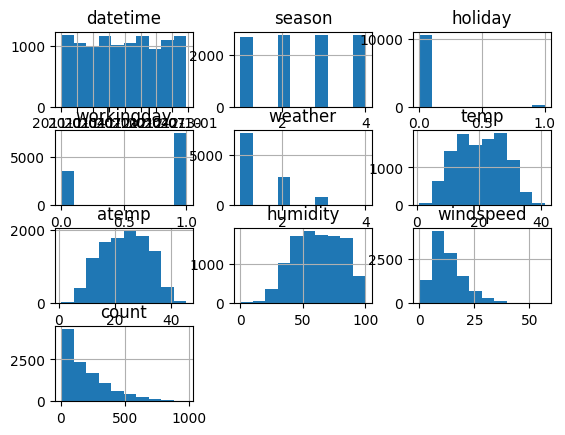

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [ ]:
# create a new feature
train["year"]=train['datetime'].dt.year
train["month"]=train['datetime'].dt.month
train["day"]=train['datetime'].dt.day
train["hour"]=train['datetime'].dt.hour
train["weekday"]=train['datetime'].dt.weekday
# droping the orignal one
train=train.drop('datetime',axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [ ]:
test["year"]=test['datetime'].dt.year
test["month"]=test['datetime'].dt.month
test["day"]=test['datetime'].dt.day
test["hour"]=test['datetime'].dt.hour
test["weekday"]=test['datetime'].dt.weekday
# droping the orignal one
test=test.drop('datetime',axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

In [ ]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'weekday'}>]], dtype=object)

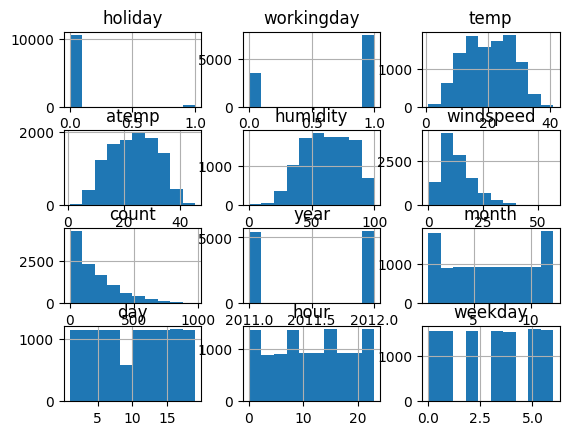

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor('count',eval_metric="rmse").fit(train_data=train,time_limit=600,
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250211_213928"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.48 GB / 12.67 GB (74.8%)
Disk Space Avail:   74.10 GB / 107.72 GB (68.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.598851  root_mean_squared_error      38.240893  307.288850                0.000713           0.034201            3       True         12
1      WeightedEnsemble_L2  -32.878143  root_mean_squared_error      36.664995  261.762273                0.000976           0.032496            2       True          7
2     ExtraTreesMSE_BAG_L2  -32.976195  root_mean_squared_error      38.039851  276.319551                0.731327          14.487154            2       True         11
3          LightGBM_BAG_L2  -33.283902  root_mean_squared_error      37.508853  292.767494                0.200329          30.935097            2       True          9
4   RandomForestMSE_BAG_L2  -33.705816  root_mean_squared_error      38.073394  306.353054   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -119.97880966975461,
  'KNeighborsDist_BAG_L1': -115.038459148802,
  'LightGBMXT_BAG_L1': -34.77198318414741,
  'LightGBM_BAG_L1': -34.43952035710387,
  'RandomForestMSE_BAG_L1': -39.031651980544346,
  'CatBoost_BAG_L1': -38.5490370446091,
  'WeightedEnsemble_L2': -32.87814303860539,
  'LightGBMXT_BAG_L2': -

In [ ]:
predictor_new_features.info()

{'path': '/content/AutogluonModels/ag-20250211_213928',
 'label': 'count',
 'random_state': 0,
 'version': '1.2',
 'features': ['season',
  'holiday',
  'workingday',
  'weather',
  'temp',
  'atemp',
  'humidity',
  'windspeed',
  'year',
  'month',
  'day',
  'hour',
  'weekday'],
 'feature_metadata_in': <autogluon.common.features.feature_metadata.FeatureMetadata at 0x7f43033e1150>,
 'time_fit_preprocessing': 0.2303009033203125,
 'time_fit_training': 431.58953881263733,
 'time_fit_total': 431.81983971595764,
 'time_limit': 420.0429048538208,
 'time_train_start': 1739310148.98478,
 'num_rows_train': 10886,
 'num_cols_train': 13,
 'num_rows_val': None,
 'num_rows_test': None,
 'num_classes': None,
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'best_model': 'WeightedEnsemble_L3',
 'best_model_score_val': -32.59885117904784,
 'best_model_stack_level': 3,
 'num_models_trained': 12,
 'num_bag_folds': 8,
 'max_stack_level': 3,
 'max_core_stack_level': 2,
 'model

In [ ]:
predictions_new = predictor_new_features.predict(test)
predictions.head()

,count
0,23.373621
1,43.331451
2,46.152283
3,49.374554
4,52.188843


In [ ]:
predictions_new.describe()

,count
count,6493.000000
mean,189.778091
std,173.530914
min,-7.053900
25%,46.647392
50%,147.676529
75%,278.343719
max,903.297852


In [ ]:
# Remember to set all negative values to zero
nig=sum(n<0 for n in predictions_new)
nig
predictions_new[predictions_new < 0] = 0

In [ ]:
predictions_new.describe()

,count
count,6493.000000
mean,189.781799
std,173.526810
min,0.000000
25%,46.647392
50%,147.676529
75%,278.343719
max,903.297852


In [ ]:
submission = submission.iloc[:, :2]

In [ ]:
submission

,datetime,count
0,2011-01-20 00:00:00,23.373621
1,2011-01-20 01:00:00,43.331451
2,2011-01-20 02:00:00,46.152283
3,2011-01-20 03:00:00,49.374554
4,2011-01-20 04:00:00,52.188843
...,...,...
6488,2012-12-31 19:00:00,159.481140
6489,2012-12-31 20:00:00,159.533524
6490,2012-12-31 21:00:00,155.287628
6491,2012-12-31 22:00:00,149.976089


In [ ]:
submission_new_features = submission.copy()
submission_new_features["count"] = 0
submission_new_features

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [ ]:
predictions_new.shape

(6493,)

In [ ]:
submission_new_features.shape

(6493, 2)

In [ ]:
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,15.150116
1,2011-01-20 01:00:00,3.663522
2,2011-01-20 02:00:00,2.768613
3,2011-01-20 03:00:00,2.655706
4,2011-01-20 04:00:00,2.310543


In [ ]:
# Same submitting predictions
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 1.02MB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2025-02-11 22:37:05  new features          complete  0.47137      0.47137       
submission_new_features.csv  2025-02-11 22:34:59  new features          error                                
submission_new_features.csv  2025-02-11 22:33:11  new features          error                                
submission_new_features.csv  2025-02-11 22:31:48  new features          error                                


#### New Score of `0.47137`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(label='count', eval_metric="rmse").fit(
    train_data=train,
    time_limit=1800,
    presets="best_quality",
    hyperparameters={
        'GBM': {'num_boost_round': 1000},
        'XGB': {'n_estimators': 1000},
        'CAT': {'iterations': 1000},
        'RF': {'n_estimators': 300},
        'XT': {'n_estimators': 300},
        'NN_TORCH': {'num_epochs': 50},
    }
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250211_224952"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.45 GB / 12.67 GB (74.6%)
Disk Space Avail:   73.14 GB / 107.72 GB (67.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -33.379680  root_mean_squared_error       8.553202  949.994523                0.007448           0.095661            3       True         14
1     WeightedEnsemble_L2 -33.670510  root_mean_squared_error       6.754568  431.911888                0.000994           0.040860            2       True          7
2       ExtraTrees_BAG_L2 -33.896710  root_mean_squared_error       7.709725  534.439600                0.758949          15.495648            2       True         11
3         CatBoost_BAG_L2 -33.898731  root_mean_squared_error       7.038590  583.775263                0.087814          64.831311            2       True         10
4         LightGBM_BAG_L2 -33.965256  root_mean_squared_error       7.151541  550.784721               

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -34.90333097946893,
  'RandomForest_BAG_L1': -39.031651980544346,
  'CatBoost_BAG_L1': -37.31682975541602,
  'ExtraTrees_BAG_L1': -38.69621174552665,
  'XGBoost_BAG_L1': -35.94854551

In [ ]:
predictions_new_h = predictor_new_hpo.predict(test)
predictions.head()

,count
0,23.373621
1,43.331451
2,46.152283
3,49.374554
4,52.188843


In [ ]:
predictions_new_h.describe()

,count
count,6493.000000
mean,188.023422
std,172.294296
min,-2.471998
25%,44.967873
50%,147.018570
75%,278.701569
max,885.794861


In [ ]:
# Remember to set all negative values to zero
nig=sum(n<0 for n in predictions_new_h)
nig
predictions_new_h[predictions_new_h < 0] = 0

In [ ]:
predictions_new_h.describe()

,count
count,6493.000000
mean,188.023849
std,172.293839
min,0.000000
25%,44.967873
50%,147.018570
75%,278.701569
max,885.794861


In [ ]:
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = 0
submission_new_hpo

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_h
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 998kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2025-02-11 23:21:53  new features with hyperparameters  complete  0.44574      0.44574       
submission_new_features.csv  2025-02-11 22:37:05  new features                       complete  0.47137      0.47137       
submission_new_features.csv  2025-02-11 22:34:59  new features                       error                                
submission_new_features.csv  2025-02-11 22:33:11  new features                       error                                


#### New Score of `0.44574 `

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.171528,root_mean_squared_error,27.130975,418.720587,0.000754,0.036147,3,True,12
1,RandomForestMSE_BAG_L2,-53.474282,root_mean_squared_error,21.190510,304.687262,0.737401,46.707929,2,True,11
2,LightGBM_BAG_L2,-55.182593,root_mean_squared_error,20.921707,297.705446,0.468599,39.726114,2,True,10
3,LightGBMXT_BAG_L2,-60.463232,root_mean_squared_error,25.924221,332.250397,5.471112,74.271065,2,True,9
4,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.056410,0.037773,0.056410,0.037773,1,True,2
5,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.057513,0.092324,0.001103,0.054551,2,True,8
6,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.056352,0.039256,0.056352,0.039256,1,True,1
7,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.899884,20.841143,0.899884,20.841143,1,True,5
8,ExtraTreesMSE_BAG_L1,-124.600676,root_mean_squared_error,0.901106,11.756961,0.901106,11.756961,1,True,7
9,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,2.003841,37.562821,2.003841,37.562821,1,True,4


In [ ]:
predictor_new_features.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-32.598851,root_mean_squared_error,38.240893,307.288850,0.000713,0.034201,3,True,12
1,WeightedEnsemble_L2,-32.878143,root_mean_squared_error,36.664995,261.762273,0.000976,0.032496,2,True,7
2,ExtraTreesMSE_BAG_L2,-32.976195,root_mean_squared_error,38.039851,276.319551,0.731327,14.487154,2,True,11
3,LightGBM_BAG_L2,-33.283902,root_mean_squared_error,37.508853,292.767494,0.200329,30.935097,2,True,9
4,RandomForestMSE_BAG_L2,-33.705816,root_mean_squared_error,38.073394,306.353054,0.764869,44.520656,2,True,10
5,LightGBMXT_BAG_L2,-33.926560,root_mean_squared_error,37.859348,297.160642,0.550823,35.328245,2,True,8
6,LightGBM_BAG_L1,-34.439520,root_mean_squared_error,6.499355,61.512319,6.499355,61.512319,1,True,4
7,LightGBMXT_BAG_L1,-34.771983,root_mean_squared_error,28.996214,116.429799,28.996214,116.429799,1,True,3
8,CatBoost_BAG_L1,-38.549037,root_mean_squared_error,0.344143,66.122730,0.344143,66.122730,1,True,6
9,RandomForestMSE_BAG_L1,-39.031652,root_mean_squared_error,0.824307,17.664929,0.824307,17.664929,1,True,5


In [ ]:
predictor_new_hpo.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-33.379680,root_mean_squared_error,8.553202,949.994523,0.007448,0.095661,3,True,14
1,WeightedEnsemble_L2,-33.670510,root_mean_squared_error,6.754568,431.911888,0.000994,0.040860,2,True,7
2,ExtraTrees_BAG_L2,-33.896710,root_mean_squared_error,7.709725,534.439600,0.758949,15.495648,2,True,11
3,CatBoost_BAG_L2,-33.898731,root_mean_squared_error,7.038590,583.775263,0.087814,64.831311,2,True,10
4,LightGBM_BAG_L2,-33.965256,root_mean_squared_error,7.151541,550.784721,0.200765,31.840769,2,True,8
5,XGBoost_BAG_L2,-34.399487,root_mean_squared_error,7.227229,549.911707,0.276453,30.967755,2,True,12
6,RandomForest_BAG_L2,-34.529943,root_mean_squared_error,7.734631,567.331179,0.783855,48.387227,2,True,9
7,NeuralNetTorch_BAG_L2,-34.716778,root_mean_squared_error,7.498225,837.731133,0.547450,318.787181,2,True,13
8,LightGBM_BAG_L1,-34.903331,root_mean_squared_error,2.034856,39.733749,2.034856,39.733749,1,True,1
9,XGBoost_BAG_L1,-35.948546,root_mean_squared_error,3.116976,39.024696,3.116976,39.024696,1,True,5


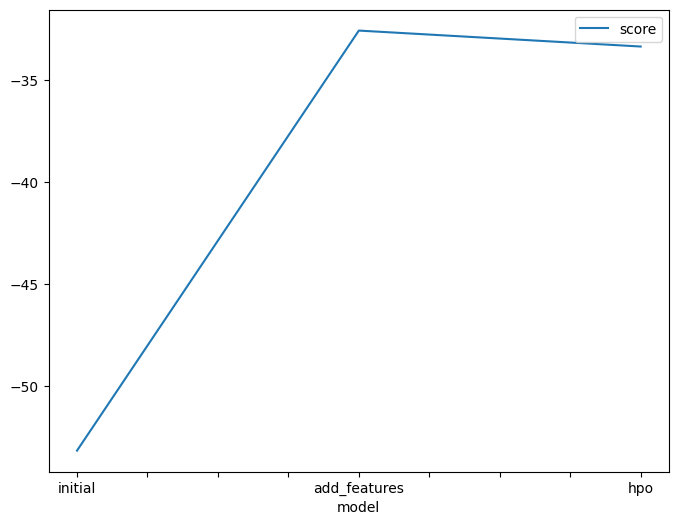

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.171528, -32.598851, -33.379680]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

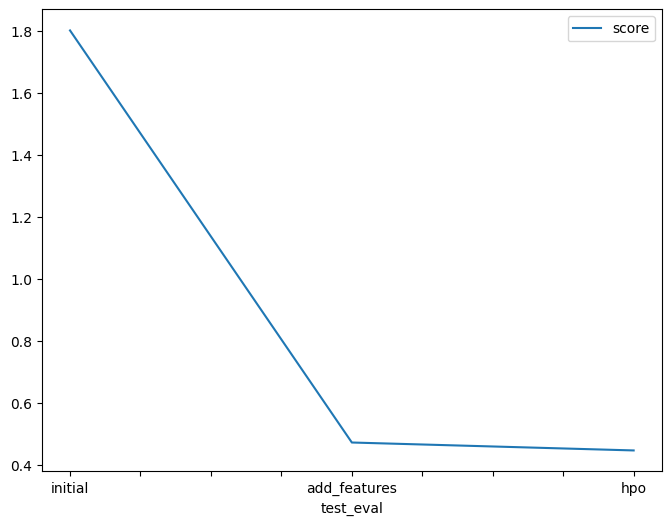

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80310, 0.47137, 0.44574]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["AutoGluon Default", "AutoGluon Default", 1000],
    "hpo2": ["AutoGluon Default", "AutoGluon Default", 1000],
    "hpo3": ["AutoGluon Default", "AutoGluon Default", 50],
    "score": [1.80310, 0.47137, 0.44574]
})

,model,hpo1,hpo2,hpo3,score
0,initial,AutoGluon Default,AutoGluon Default,AutoGluon Default,1.80310
1,add_features,AutoGluon Default,AutoGluon Default,AutoGluon Default,0.47137
2,hpo,1000,1000,50,0.44574
